In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import datetime
from pprint import pprint
%matplotlib inline

In [5]:
# build mementos on FP4 program online

max_year = '1998'
min_year = '1994'

timemaps_structure = {}

for timemap_file in os.listdir('./mementos_all_with_url'):           
    with open('./mementos_all_with_url/' + timemap_file) as timemap:    
        timemap_json = json.load(timemap)                            
        original_uri = timemap_json['original_uri']        
        if timemap_json.get('mementos',0) != 0:
            all_mementos = timemap_json['mementos']['list']         
            accepted_mementos = []
            for memento in all_mementos:                
                date_string = memento['datetime']                
                date = datetime.datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%S%fZ")
                if (int(date.year) >= int(min_year) and int(date.year) <= int(max_year)):
                    accepted_mementos.append(memento)        
            timemaps_structure[original_uri] = accepted_mementos

In [6]:
iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:        
        count += 1        
print "Number of URIs with a version archived: %s" % count            

Number of URIs with a version archived: 372


In [7]:
# Mementos frequency distribution
timemaps_frequency = {}

iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:
        timemaps_frequency[uri] = len(mementos)
#print "Number of URIs without any version archived: %s" % count 

In [8]:
timemaps_structure

{u'http://137.251.53.228/hpretail/': [],
 u'http://194.80.29.2/cite/index.html': [],
 u'http://abyss.iopan.gda.pl/biocolor/': [{u'datetime': u'1998-12-01T22:51:29Z',
   u'uri': u'http://web.archive.org/web/19981201225129/http://abyss.iopan.gda.pl/biocolor/'},
  {u'datetime': u'1998-12-01T22:51:29Z',
   u'uri': u'http://web.archive.bibalex.org:80/web/19981201225129/http://abyss.iopan.gda.pl/biocolor/'},
  {u'datetime': u'1998-12-02T06:46:57Z',
   u'uri': u'http://web.archive.org/web/19981202064657/http://abyss.iopan.gda.pl/biocolor'}],
 u'http://adviser.tno.it/adviser/': [{u'datetime': u'1998-12-03T01:03:40Z',
   u'uri': u'http://web.archive.org/web/19981203010340/http://adviser.tno.it/adviser'},
  {u'datetime': u'1998-12-07T07:12:06Z',
   u'uri': u'http://web.archive.org/web/19981207071206/http://adviser.tno.it/adviser/'}],
 u'http://agent.ign.fr': [],
 u'http://alfa.ist.utl.pt/~cesur/softice': [],
 u'http://anders.ftf.lth.se/coop/Qswitch.html': [{u'datetime': u'1996-11-05T01:39:12Z',


In [9]:
from urlparse import urlparse
import re

domains = []

iterator = timemaps_structure.iteritems()
domains_not_archived = []
domains_archived = []
for uri,mementos in iterator:    
    if mementos == []:
        url = urlparse(uri)
        url_parsed = url.netloc.split('.')
        domains_not_archived.append(url_parsed[len(url_parsed) - 1])
    else:
        url = urlparse(uri)
        url_parsed = url.netloc.split('.')
        domains_archived.append(url_parsed[len(url_parsed) - 1])
#print "Number of URIs without any version archived: %s" % count 

In [10]:
from collections import Counter
counter_not_archived = Counter(domains_not_archived)
counter_archived = Counter(domains_archived)

In [11]:
counter_not_archived

Counter({u'2': 1,
         u'228': 1,
         u'at': 4,
         u'be': 10,
         u'ch': 1,
         u'com': 30,
         u'cz': 1,
         u'de': 46,
         u'de:8080': 1,
         u'dk': 8,
         u'edu': 1,
         u'es': 16,
         u'eu': 7,
         u'fi': 3,
         u'fr': 23,
         u'fr:9010': 1,
         u'gov': 1,
         u'gr': 10,
         u'ie': 9,
         u'info': 1,
         u'it': 18,
         u'it:8080': 1,
         u'lu': 1,
         u'net': 7,
         u'nl': 15,
         u'no': 5,
         u'org': 24,
         u'org:1999': 1,
         u'pt': 2,
         u'se': 5,
         u'uk': 56,
         u'uk:80': 1})

In [12]:
counter_archived

Counter({u'at': 8,
         u'be': 19,
         u'ch': 4,
         u'com': 21,
         u'de': 49,
         u'dk': 11,
         u'edu': 1,
         u'es': 18,
         u'fi': 9,
         u'fr': 28,
         u'fr:8104': 1,
         u'gr': 17,
         u'ie': 4,
         u'is': 2,
         u'is:80': 1,
         u'it': 28,
         u'it:7117': 1,
         u'lu': 3,
         u'net': 3,
         u'nl': 25,
         u'nl:80': 1,
         u'no': 10,
         u'org': 32,
         u'pl': 1,
         u'pt': 2,
         u'se': 16,
         u'uk': 56,
         u'uk:80': 1})

In [13]:
counter_not_archived['eu'] / 178.

0.03932584269662921

# Web Archives Distribution

In [14]:
# Mementos frequency distribution
list_mementos = []

iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:
        for m in mementos:
            list_mementos.append(m)
#print "Number of URIs without any version archived: %s" % count 

In [15]:
web_archives = []
for memento in list_mementos:
    web_archives.append(memento['uri'].split('/')[2])

web_archives_distribution = Counter(web_archives)    

In [16]:
web_archives_distribution

Counter({u'arquivo.pt': 6,
         u'wayback.vefsafn.is': 10,
         u'web.archive.bibalex.org:80': 311,
         u'web.archive.org': 1160,
         u'webarchive.nationalarchives.gov.uk': 1})

In [17]:
len(list_mementos)

1488

([<matplotlib.axis.XTick at 0x7fbc5dc72f90>,
 <a list of 5 Text xticklabel objects>)

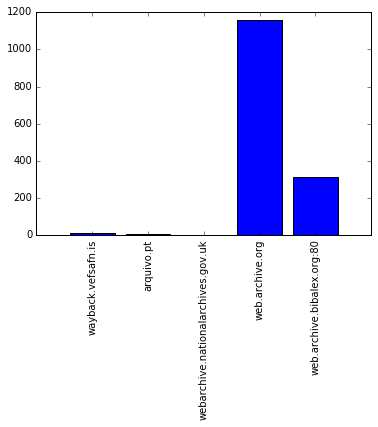

In [18]:
plt.bar(range(len(web_archives_distribution)), web_archives_distribution.values(), align='center',)
plt.xticks(range(len(web_archives_distribution)), web_archives_distribution.keys(),  rotation='vertical')

In [19]:
9032/9961.

0.9067362714586888

# FP4 Archvived versions location distribution

In [21]:
iterator = timemaps_structure.iteritems()
count = 0
rows_list = []
for uri,mementos in iterator:     
    if mementos != []:        
        dictrow = {}    
        dictrow['URI-O'] = uri
        for m in mementos:        
            dictrow[m['uri'].split('/')[2]] = 1
        rows_list.append(dictrow)

In [24]:
df = pd.DataFrame(rows_list)
df.count()

URI-O                                 372
arquivo.pt                              4
wayback.vefsafn.is                      3
web.archive.bibalex.org:80            107
web.archive.org                       372
webarchive.nationalarchives.gov.uk      1
dtype: int64

In [25]:
df.count() / 853 * 100

URI-O                                 43.610785
arquivo.pt                             0.468933
wayback.vefsafn.is                     0.351700
web.archive.bibalex.org:80            12.543962
web.archive.org                       43.610785
webarchive.nationalarchives.gov.uk     0.117233
dtype: float64